## - To compare multiple files for files under a same directory

In [1]:
%matplotlib notebook
import flashytlib.plot as fyplt
import flashytlib.calculator as fycal
import numpy as np

ProblemDirLine = '/Users/ranchu/ToDownload/'
ProblemDirLine2 = 'Chimera_S25_100ms_Rad/Frozen_KS_optionR/16E' # will be used as title
FileIndex    = [0,1,10,20,100,500]

# default
filenamebase = '/deleptonizationwave_hdf5_chk_'
fnum = len(FileIndex)
fullfilenames = fnum*['?']
for i in range(fnum):
    fileindex = FileIndex[i]
    directory  = ProblemDirLine + ProblemDirLine2    
    # ---
    fullfilenames[i] = directory + filenamebase + '{:04d}'.format(fileindex)

# memory allocation
AverageEnergy = fnum * ['?']
AverageFluxFactor = fnum * ['?']
Luminosity = fnum * ['?']
NumberDensity = fnum * ['?']
EnergyDensity = fnum * ['?']
J = fnum * ['?']
for i in range(fnum):
    filename = fullfilenames[i]
    print(filename)
    [NumberDensity[i], EnergyDensity[i], AverageEnergy[i], J[i], ECenter, Radius] \
    = fycal.ReadMoment_Zeroth(filename)
    [Luminosity[i], H1, ECenter_H, Radius] \
    = fycal.ReadMoment_First(filename)
    AverageFluxFactor[i] \
    = np.true_divide(Luminosity[i],EnergyDensity[i])

/Users/ranchu/ToDownload/Chimera_S25_100ms_Rad/Frozen_KS_optionR/16E/deleptonizationwave_hdf5_chk_0000
/Users/ranchu/ToDownload/Chimera_S25_100ms_Rad/Frozen_KS_optionR/16E/deleptonizationwave_hdf5_chk_0001
/Users/ranchu/ToDownload/Chimera_S25_100ms_Rad/Frozen_KS_optionR/16E/deleptonizationwave_hdf5_chk_0010
/Users/ranchu/ToDownload/Chimera_S25_100ms_Rad/Frozen_KS_optionR/16E/deleptonizationwave_hdf5_chk_0020
/Users/ranchu/ToDownload/Chimera_S25_100ms_Rad/Frozen_KS_optionR/16E/deleptonizationwave_hdf5_chk_0100
/Users/ranchu/ToDownload/Chimera_S25_100ms_Rad/Frozen_KS_optionR/16E/deleptonizationwave_hdf5_chk_0500


<IPython.core.display.Javascript object>


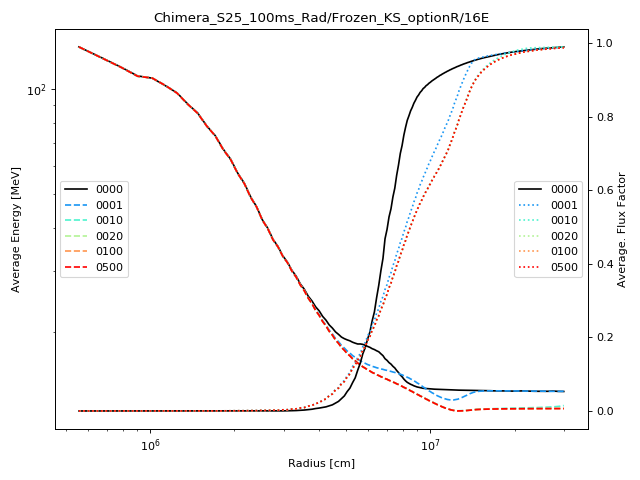

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

colors = cm.rainbow(np.linspace(0, 1, fnum))
LineTypes = ['solid','dashdot', 'dashed','dotted'] # rolling in use
fig, ax1 = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# --- Number Density ---
ax1.set_title(ProblemDirLine2)
ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel('Average Energy [MeV]')
lns = 2*fnum * ['?']
for i in range(fnum):
    leg = '{:04d}'.format(FileIndex[i])
    if( i == 0):
        lns[i] = ax1.plot(Radius,AverageEnergy[i],'-',color='black',label=leg)
    else:
        lns[i] = ax1.plot(Radius,AverageEnergy[i],'--',color=colors[i],label=leg)

ax1.set_yscale('log')
ax1.set_xscale('log') 
ax1.tick_params(axis='y')
ax1.legend(loc='center left')
# --- Average Flux Factor ---
ax2 = ax1.twinx()
ax2.set_ylabel('Average. Flux Factor')
ax2.set_yscale('linear')
ax2.tick_params(axis='y')
for i in range(fnum):
    leg = '{:04d}'.format(FileIndex[i])
    if( i == 0):
        lns[i] = ax2.plot(Radius,AverageFluxFactor[i],'-',color='black',label=leg)
    else:
        lns[i] = ax2.plot(Radius,AverageFluxFactor[i],':',color=colors[i],label=leg)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#ax1.legend(loc='right')
ax2.legend(loc='right')
#plt.show()


<IPython.core.display.Javascript object>


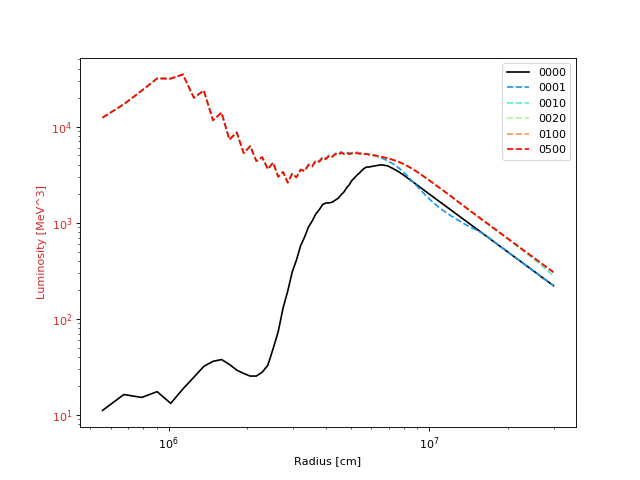

In [6]:

fig, ax1 = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# --- Luminosity ---
color = 'tab:red'
ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel('Luminosity [MeV^3]',color=color)
lns = 2*fnum * ['?']
for i in range(fnum):
    leg = '{:04d}'.format(FileIndex[i])#'Ave. Energy ' + ClosureIndex[i] + '{:04d}'.format(FileIndex[i])
    if(i == 0):
        lns[i] = ax1.plot(Radius,Luminosity[i],color='black',label=leg)
    else:
        lns[i] = ax1.plot(Radius,Luminosity[i],'--',color=colors[i],label=leg)

ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='best')

plt.show()

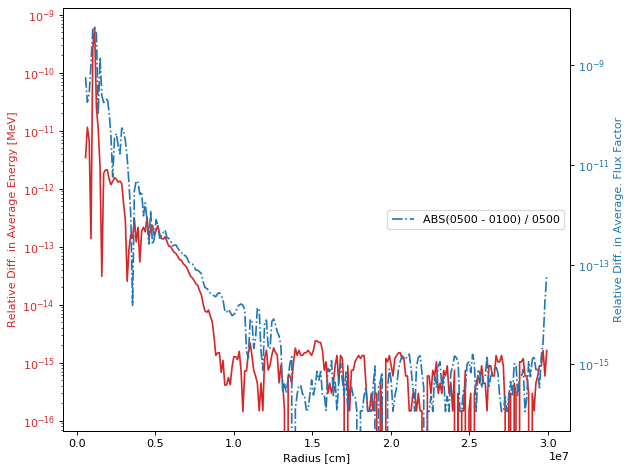

In [7]:
%matplotlib inline

base_i = fnum-1
comp_i = 4

RelativeDiff_AverageEnergy= abs(AverageEnergy[base_i]-AverageEnergy[comp_i])/AverageEnergy[base_i]
RelativeDiff_AverageFluxFactor= abs(AverageFluxFactor[base_i]-AverageFluxFactor[comp_i])/abs(AverageFluxFactor[base_i])

import matplotlib.pyplot as plt

LineType     = ['solid','dashdot', 'dashed','dotted','dashdot']
#fig, ax1 = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax1 = plt.subplots(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# --- Number Density ---
color = 'tab:red'
ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel('Relative Diff. in Average Energy [MeV]',color=color)
lns = 2*fnum *['?']
leg = 'ABS('+ '{:04d}'.format(FileIndex[base_i])+' - '+'{:04d}'.format(FileIndex[comp_i])
leg = leg + ') / '+'{:04d}'.format(FileIndex[base_i])
lns[0] = ax1.plot(Radius,RelativeDiff_AverageEnergy,linestyle=LineType[0],color=color,label=leg)

ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor=color)
# --- Average Flux Factor ---
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Relative Diff. in Average. Flux Factor', color=color)
lns[1] = ax2.plot(Radius, RelativeDiff_AverageFluxFactor,linestyle=LineType[1], color=color,label=leg)

ax2.set_yscale('log')    
ax2.tick_params(axis='y', labelcolor=color)
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#ax1.legend(loc='upper left')
ax2.legend(loc='right')

plt.show()